In [1]:
from ClassesSim import MCCTClassical
import numpy as np 
import matplotlib.pyplot as plt
from fractions import Fraction
def binder(param):
    return 1-np.average(param**4, axis=0)/(3*np.average(param**2,axis=0)**2)
def binderr(param):
    first = -1/(3*np.average(param**2,axis=0)**2) * np.std((param)**4,axis=0,ddof=1)/np.sqrt(len(param[:,0,0,0]))
    second = np.average(param**4, axis=0)/(np.average(param**2,axis=0)**3)*np.std(param*2,axis=0,ddof=1)/np.sqrt(len(param[:,0,0,0]))
    return np.sqrt(first**2+second**2)


We start with the familiar probabilistic control map in 1D


In [2]:
Control1d1 = MCCTClassical(100,1,10,100**2//2,[0],np.linspace(0,100,100),100,-1,1,0)
Control1d15 = MCCTClassical(150,1,10,100**2//2,[0],np.linspace(0,100,100),100,-1,1,0)
Control1d2 = MCCTClassical(200,1,10,100**2//2,[0],np.linspace(0,100,100),100,-1,1,0)

We have defined the simulation class MCCTClassical in ClassesSim.py. This is the general class created for the probabilistic control + monte carlo simulation in less than 3 dimensions.

The general structure of the class definition is (bitstring length, number of bitstrings, simulation # of steps, range of thermodynamic betas for monte carlo, range of probabilities for probabilistic control, number of iterations per set of parameters, hamiltonian coupling constant (-1 for ferro, 1 for antiferro), how many times should the probabilistic control map be executed per simulation step, how many times the monte carlo update of the lattice should be applied per simulation step, boltzmann probability modifier)

Note that in the current implementation, each monte carlo update is a full sweep of the lattice i.e. a number of bits equal to Length*Num_Chains are chosen.

The boltzmann probability modifier means that the chosen constant c is multiplied to the boltzmann probability such that

$\text{modified Boltzmann Probability} = c e^{-\beta(E_f-E_i)}$

In [3]:
Control1d1.Simulation()
Control1d15.Simulation()
Control1d2.Simulation()

In [7]:
a1 = np.average(Control1d1.record1,axis=0)
s1 = np.std(Control1d1.record1,axis=0,ddof=1)/np.sqrt(Control1d1.iterations)
a15 = np.average(Control1d15.record1,axis=0)
s15 = np.std(Control1d15.record1,axis=0,ddof=1)/np.sqrt(Control1d15.iterations)
a2 = np.average(Control1d2.record1,axis=0)
s2 = np.std(Control1d2.record1,axis=0,ddof=1)/np.sqrt(Control1d2.iterations)


Text(0, 0.5, '$-\\sum_{i=0}^L \\sigma_{i}\\sigma_{i-1}$')

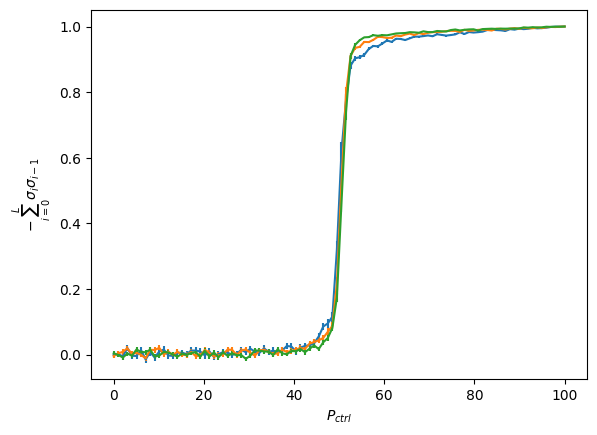

In [12]:
fig,ax = plt.subplots()
ax.errorbar(Control1d1.probrange,a1[-1,0,:],yerr=s1[-1,0,:])
ax.errorbar(Control1d15.probrange,a15[-1,0,:],yerr=s15[-1,0,:])
ax.errorbar(Control1d2.probrange,a2[-1,0,:],yerr=s2[-1,0,:])
ax.set_xlabel(r'$P_{ctrl}$')
ax.set_ylabel(r'$-\sum_{i=0}^L \sigma_{i}\sigma_{i-1}$')

(48.0, 55.0)

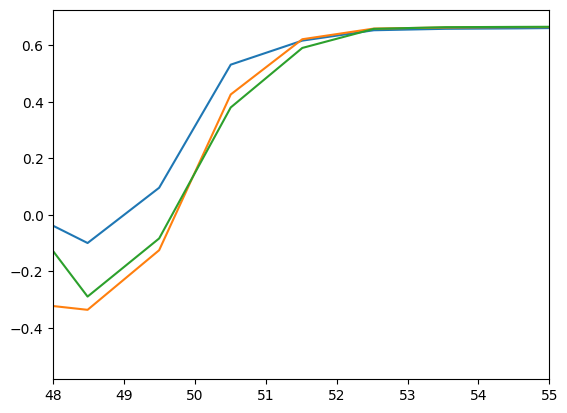

In [19]:
fig,ax=plt.subplots()
ax.plot(Control1d1.probrange,binder(Control1d1.record1)[-1,0,:])
ax.plot(Control1d15.probrange,binder(Control1d15.record1)[-1,0,:])
ax.plot(Control1d2.probrange,binder(Control1d2.record1)[-1,0,:])
ax.set_xlim(48,55)